## **This is the Vidhan Sabha election result Analysis of Andhra Pradesh**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [16]:
data_ap=pd.read_csv("Andhra_Pradesh.csv")

In [17]:
data_ap.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,Achanta,56,SATYANARAYANA PITHANI,Telugu Desam,CHERUKUVADA SRI RANGANADHA RAJU,Yuvajana Sramika Rythu Congress Party,26554,Result Declared
1,Addanki,105,GOTTIPATI RAVI KUMAR,Telugu Desam,CHINNA HANIMIREDDY PANEM,Yuvajana Sramika Rythu Congress Party,24890,Result Declared
2,Adoni,146,DR. PARTHA SARATHI VALMIKI,Bharatiya Janata Party,Y. SAI PRASAD REDDY,Yuvajana Sramika Rythu Congress Party,18164,Result Declared
3,Allagadda,134,AKHILA PRIYA BHUMA,Telugu Desam,BRIJENDRA REDDY GANGULA (NANI),Yuvajana Sramika Rythu Congress Party,12037,Result Declared
4,Alur,147,B. VIRUPAKSHI,Yuvajana Sramika Rythu Congress Party,B. VEERABHADRA GOWD,Telugu Desam,2831,Result Declared


In [50]:
data_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        175 non-null    object
 1   Const. No.          175 non-null    int64 
 2   Leading Candidate   175 non-null    object
 3   Leading Party       175 non-null    object
 4   Trailing Candidate  175 non-null    object
 5   Trailing Party      175 non-null    object
 6   Margin              175 non-null    int64 
 7   Status              175 non-null    object
dtypes: int64(2), object(6)
memory usage: 11.1+ KB


## Observation
- **Margin and Constituency numbers are of Integer type**
- **there are no missing rows**
- **There are a total of 8 columns**

In [18]:
data_ap.shape

(175, 8)

In [19]:
data_ap["Leading Party"].value_counts()

Leading Party
Telugu Desam                             135
Janasena Party                            21
Yuvajana Sramika Rythu Congress Party     11
Bharatiya Janata Party                     8
Name: count, dtype: int64

In [20]:
data_ap["Constituency"].value_counts().sum()

175

In [21]:
data_ap.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Constituency,175,175,Achanta,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Const. No.,175.0,NaN,NaN,NaN,88.0,50.662281,1.0,44.5,88.0,131.5,175.0
Leading Candidate,175,175,SATYANARAYANA PITHANI,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leading Party,175,4,Telugu Desam,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trailing Candidate,175,175,CHERUKUVADA SRI RANGANADHA RAJU,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trailing Party,175,3,Yuvajana Sramika Rythu Congress Party,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Margin,175.0,NaN,NaN,NaN,32732.091429,20006.574848,351.0,18562.5,29371.0,44143.5,95235.0
Status,175,1,Result Declared,175,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Observations
- **There are a total of 175 Vidhan Sabha seats in Andhra Pradesh**
- **There are 4 unique parties that contested for the vidhan sabha election**
- **The Telugu Desham Party has the highest number of seats in the Vidhan Sabha with 135 seats. Followed by Janasena party 21 seats**
- **BJP has secured only 8 seats in the state**

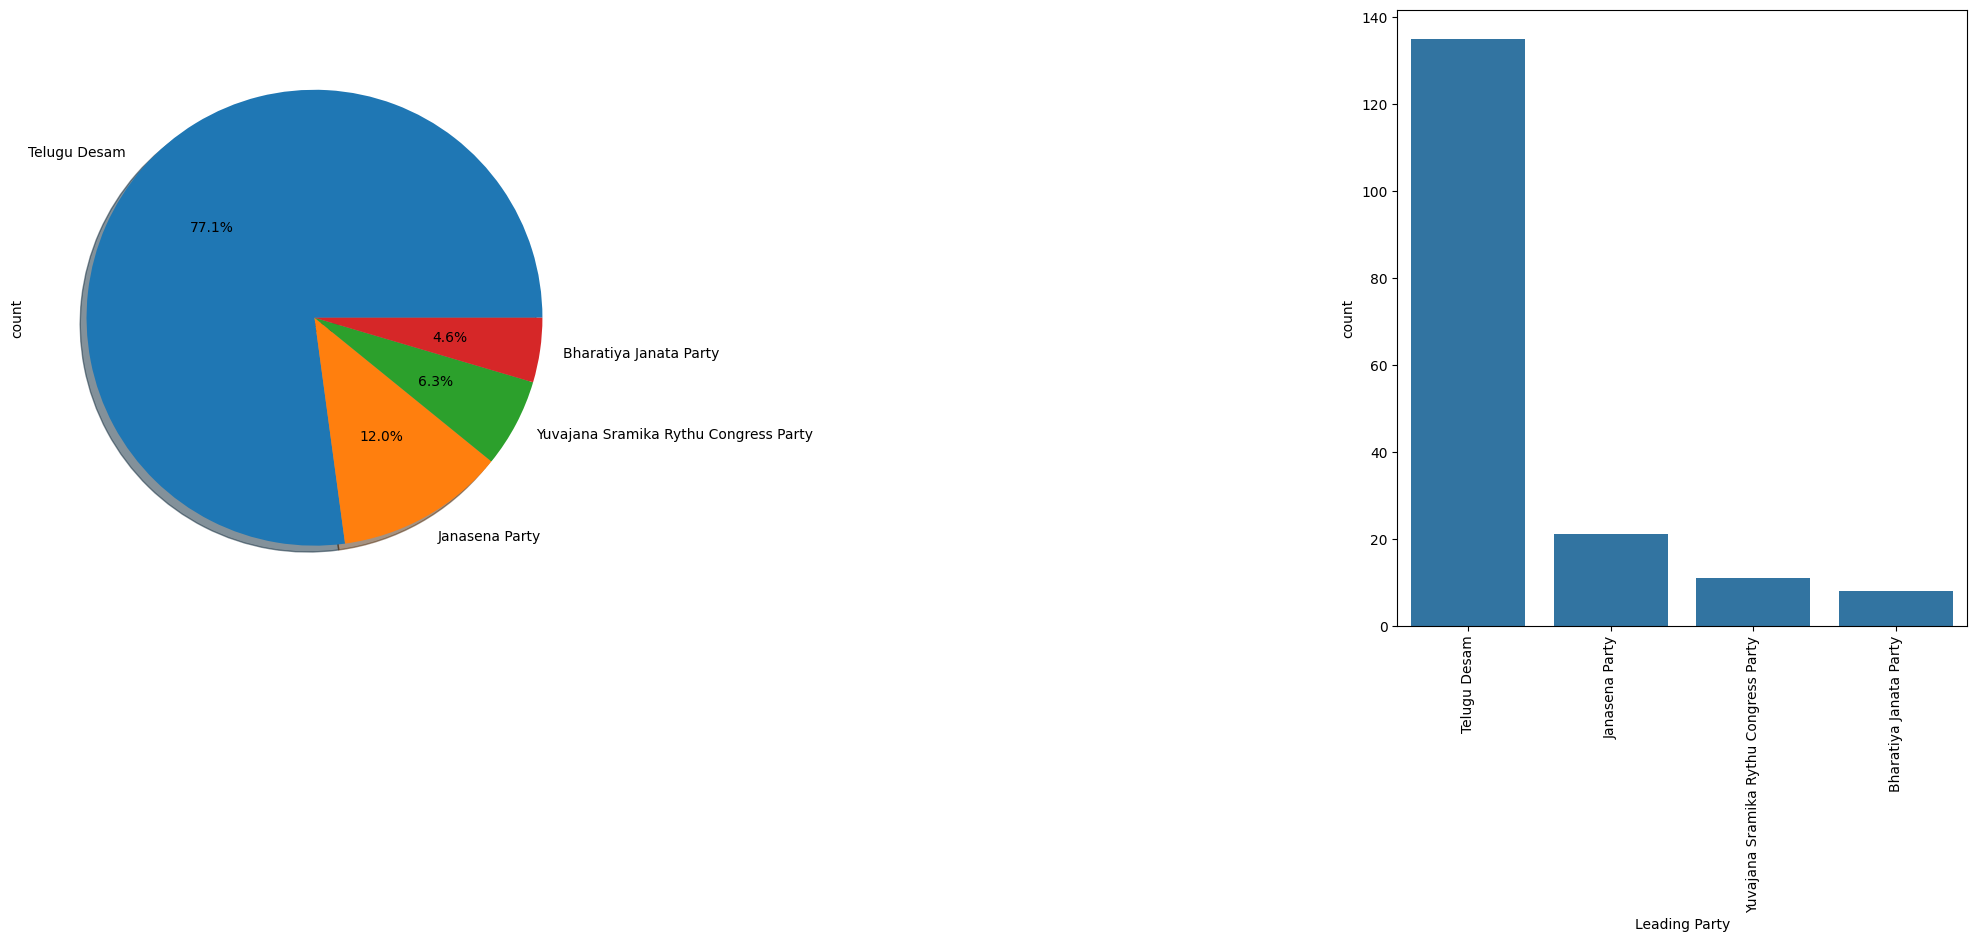

In [38]:
plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
data_ap["Leading Party"].value_counts().plot.pie(autopct="%1.1f%%",shadow=True)
plt.subplot(1,3,3)
plt.xticks(rotation=90)
sns.countplot(data=data_ap,x="Leading Party",order=data_ap["Leading Party"].value_counts().index).ylabel=None

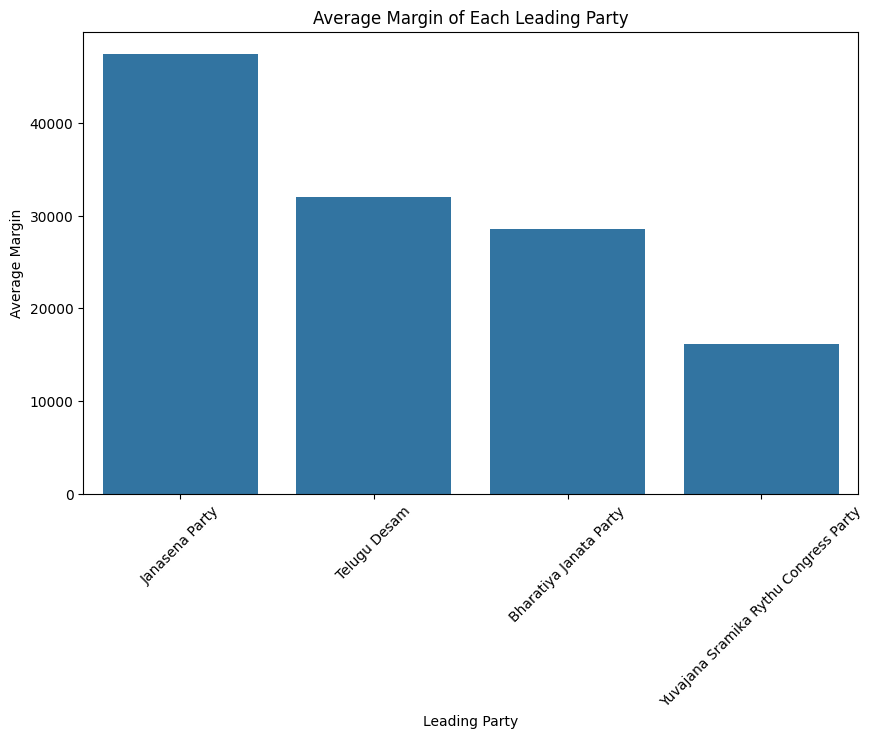

In [49]:
def plot_average_margin(dataframe):
    # Calculate the average margin for each leading party
    avg_margin = dataframe.groupby("Leading Party")["Margin"].mean().reset_index()
    avg_margin = avg_margin.sort_values(by="Margin",ascending=False)
    
    # Plot the results using a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=avg_margin, x="Leading Party", y="Margin",order=avg_margin["Leading Party"])
    
    # Add titles and labels
    plt.title('Average Margin of Each Leading Party')
    plt.xticks(rotation=45)
    plt.xlabel('Leading Party')
    plt.ylabel('Average Margin')
    
    # Display the plot
    plt.show()

# Call the function with the DataFrame
plot_average_margin(data_ap)

## Observation
- **Janasena Party has the highest average winning margin** 

In [52]:
top5_margin=data_ap.sort_values(by='Margin', ascending=False).head(5)
top5_margin

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
33,Gajuwaka,25,PALLA SRINIVAS RAO,Telugu Desam,AVSS AMARNATH GUDIVADA,Yuvajana Sramika Rythu Congress Party,95235,Result Declared
17,Bhimili,20,GANTA SRINIVASA RAO,Telugu Desam,MUTTAMSETTI SRINIVASA RAO (AVANTHI SRINIVAS),Yuvajana Sramika Rythu Congress Party,92401,Result Declared
75,Mangalagiri,87,NARA LOKESH,Telugu Desam,MURUGUDU LAVANYA,Yuvajana Sramika Rythu Congress Party,91413,Result Declared
111,Pendurthi,31,PANCHAKARLA RAMESH BABU,Janasena Party,ANNAMREDDY ADEEP RAJ,Yuvajana Sramika Rythu Congress Party,81870,Result Declared
90,Nellore City,117,NARAYANA PONGURU,Telugu Desam,KHALEEL AHAMAD MD,Yuvajana Sramika Rythu Congress Party,72489,Result Declared


In [53]:
top5_margin=data_ap.sort_values(by='Margin', ascending=True).head(5)
top5_margin

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
71,Madakasira (SC),156,M.S.RAJU,Telugu Desam,IRALAKKAPPA.S.L,Yuvajana Sramika Rythu Congress Party,351,Result Declared
37,Giddalur,112,ASHOK REDDY MUTHUMULA,Telugu Desam,KUNDURU NAGARJUNA REDDY (KP),Yuvajana Sramika Rythu Congress Party,973,Result Declared
26,Darsi,103,BUCHEPALLI SIVA PRASAD REDDY,Yuvajana Sramika Rythu Congress Party,GOTTIPATI LAKSHMI,Telugu Desam,2456,Result Declared
132,Rayachoti,128,MANDIPALLI RAMPRASAD REDDY,Telugu Desam,GADIKOTA SRIKANTH REDDY,Yuvajana Sramika Rythu Congress Party,2495,Result Declared
4,Alur,147,B. VIRUPAKSHI,Yuvajana Sramika Rythu Congress Party,B. VEERABHADRA GOWD,Telugu Desam,2831,Result Declared


## Obsrvation
- **Palla Srinivas Rao from Telugu Desham Party has won with the highest number of vote margin**
- **M.S. Raju from Telugu Desham Party has won with the lowest vote margin**

<Axes: xlabel='Margin'>

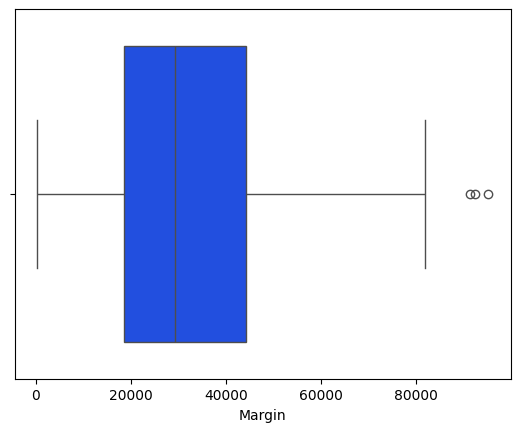

In [57]:
plt.xlabel("Margin")
sns.boxplot(data=data_ap,x="Margin",palette='bright')

## Observation
- **75% of candidates has won by a margin of more than 4000**
- **there are outliers present on the upper whisker**